In [105]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

In [304]:
# importing data

bank = pd.read_csv("bank-additional-full.csv",sep = ';')

In [253]:
#check the shape of the dataset

print("There are {} rows and {} coloumns".format(bank.shape[0],bank.shape[1]))

There are 41188 rows and 21 coloumns


In [254]:
# To see first 5 Observations from the data set

bank.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [255]:
# To see last 5 observations of the data

bank.tail()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41187,74,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,3,999,1,failure,-1.1,94.767,-50.8,1.028,4963.6,no


In [256]:
# To know the data type of each feature

bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
age               41188 non-null int64
job               41188 non-null object
marital           41188 non-null object
education         41188 non-null object
default           41188 non-null object
housing           41188 non-null object
loan              41188 non-null object
contact           41188 non-null object
month             41188 non-null object
day_of_week       41188 non-null object
duration          41188 non-null int64
campaign          41188 non-null int64
pdays             41188 non-null int64
previous          41188 non-null int64
poutcome          41188 non-null object
emp.var.rate      41188 non-null float64
cons.price.idx    41188 non-null float64
cons.conf.idx     41188 non-null float64
euribor3m         41188 non-null float64
nr.employed       41188 non-null float64
y                 41188 non-null object
dtypes: float64(5), int64(5), object(11)
memory usa

In [308]:
for column in bank.columns:
    if bank[column].dtype == 'object':
        bank[column] = bank[column].astype('category') 
    else:
        pass

In [258]:
bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
age               41188 non-null int64
job               41188 non-null category
marital           41188 non-null category
education         41188 non-null category
default           41188 non-null category
housing           41188 non-null category
loan              41188 non-null category
contact           41188 non-null category
month             41188 non-null category
day_of_week       41188 non-null category
duration          41188 non-null int64
campaign          41188 non-null int64
pdays             41188 non-null int64
previous          41188 non-null int64
poutcome          41188 non-null category
emp.var.rate      41188 non-null float64
cons.price.idx    41188 non-null float64
cons.conf.idx     41188 non-null float64
euribor3m         41188 non-null float64
nr.employed       41188 non-null float64
y                 41188 non-null category
dtypes: category(11), float64

In [259]:
bank.describe().T

,count,mean,std,min,25%,50%,75%,max
age,41188.0,40.024060,10.421250,17.000,32.000,38.000,47.000,98.000
duration,41188.0,258.285010,259.279249,0.000,102.000,180.000,319.000,4918.000
campaign,41188.0,2.567593,2.770014,1.000,1.000,2.000,3.000,56.000
pdays,41188.0,962.475454,186.910907,0.000,999.000,999.000,999.000,999.000
previous,41188.0,0.172963,0.494901,0.000,0.000,0.000,0.000,7.000
emp.var.rate,41188.0,0.081886,1.570960,-3.400,-1.800,1.100,1.400,1.400
cons.price.idx,41188.0,93.575664,0.578840,92.201,93.075,93.749,93.994,94.767
cons.conf.idx,41188.0,-40.502600,4.628198,-50.800,-42.700,-41.800,-36.400,-26.900
euribor3m,41188.0,3.621291,1.734447,0.634,1.344,4.857,4.961,5.045
nr.employed,41188.0,5167.035911,72.251528,4963.600,5099.100,5191.000,5228.100,5228.100



**Input variables:**

- 1 - age (numeric)

- 2 - job : 
Type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')

- 3 - marital :
marital status (categorical: 'divorced','married','single','unknown';) 
                note: 'divorced' means divorced or widowed)

- 4 - education : 
(categorical: 'tertiary', 'secondary', 'unknown', 'primary')

- 5 - default: has credit in default? 
(categorical: 'no','yes','unknown')

- 6 - housing: has housing loan? 
(categorical: 'no','yes','unknown')

- 7 - loan: has personal loan? 
(categorical: 'no','yes','unknown')

- 8 - contact: contact communication type 
(categorical: 'cellular','telephone')

- 9 - month: last contact month of year 
(categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')

- 10 - day: last contact day of the month 
(numeric: 1,2,3,....)

- 11 - duration: last contact duration, in seconds (numeric).

        Important note: This attribute highly affects the output Target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.

- 12 - campaign: number of contacts performed during this campaign and for this client 
(numeric, includes last contact)

- 13 - pdays: number of days that passed by after the client was last contacted from a previous campaign 
(numeric; 999 means client was not previously contacted)

- 14 - previous: number of contacts performed before this campaign and for this client (numeric)

- 15 - poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')
 social and economic context attributes

- 16 - emp.var.rate: employment variation rate - quarterly indicator (numeric)

- 17 - cons.price.idx: consumer price index - monthly indicator (numeric) 

- 18 - cons.conf.idx: consumer confidence index - monthly indicator (numeric) 

- 19 - euribor3m: euribor 3 month rate - daily indicator (numeric)

- 20 - nr.employed: number of employees - quarterly indicator (numeric)

Output variable (desired target):
- 21 - y - has the client subscribed a term deposit? (binary: 'yes','no')



### A term deposit is a cash investment held at a bank.Money is invested for an agreed rate of interest over a fixed amount of time, or term. 

In [260]:
# To check whether Null values is there or not in the dataset

bank.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

- **There are no Null values in the data.**

### Data Visualization

In [265]:
bank['y'].value_counts()

no     36548
yes     4640
Name: y, dtype: int64

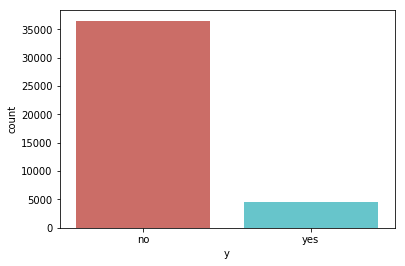

In [266]:
sns.countplot(x='y',data=bank, palette='hls')
plt.show()

- There are 36548 no's and 4640 yes's in the outcome variables.

In [267]:
# Let's get a sense of the numbers across the two classes

bank.groupby('y').mean()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
y,,,,,,,,,,
no,39.911185,220.844807,2.633085,984.113878,0.132374,0.248875,93.603757,-40.593097,3.811491,5176.166600
yes,40.913147,553.191164,2.051724,792.035560,0.492672,-1.233448,93.354386,-39.789784,2.123135,5095.115991


### Observations:

1.The average age of customers who bought the term deposit is higher than that of the customers who didn't.

2.Surprisingly, campaigns (number of contacts or calls made during the current campaign) are lower for customers who bought the term deposit.

3.The Average duration of the calls(in seconds) is more for customers who bought the term deposit than who didn't

4.The Average number of contacts performed before this campaign influencying the customers to bought the term deposit

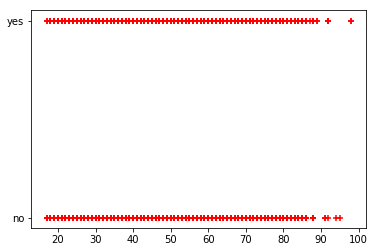

In [269]:
plt.scatter(bank.age,bank.y,marker='+',color='red')

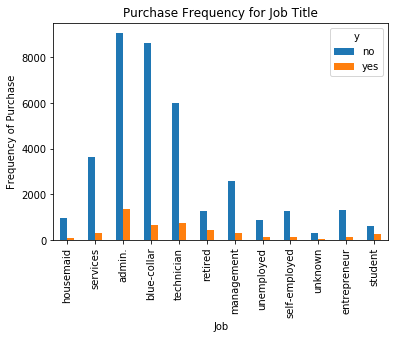

In [270]:
%matplotlib inline
pd.crosstab(bank.job,bank.y).plot(kind='bar')
plt.title('Purchase Frequency for Job Title')
plt.xlabel('Job')
plt.ylabel('Frequency of Purchase')

- The frequency of purchase of the deposit depends a great deal on the job title. Thus, the job title can be a good predictor of the outcome variable.

Text(0,0.5,'Proportion of Customers')

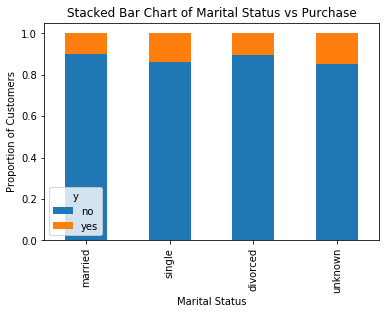

In [273]:
table=pd.crosstab(bank.marital,bank.y)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Stacked Bar Chart of Marital Status vs Purchase')
plt.xlabel('Marital Status')
plt.ylabel('Proportion of Customers')

- The marital status does not seem a strong predictor for the outcome variable.

Text(0,0.5,'Proportion of Customers')

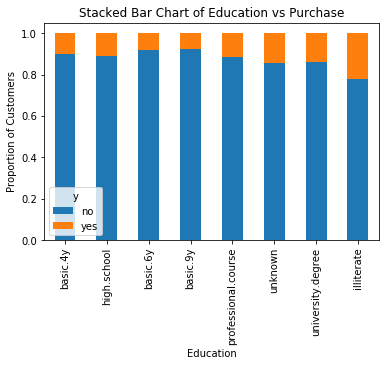

In [275]:
table=pd.crosstab(bank.education,bank.y)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Stacked Bar Chart of Education vs Purchase')
plt.xlabel('Education')
plt.ylabel('Proportion of Customers')

- Education seems a good predictor of the outcome variable.

Text(0,0.5,'Frequency of Purchase')

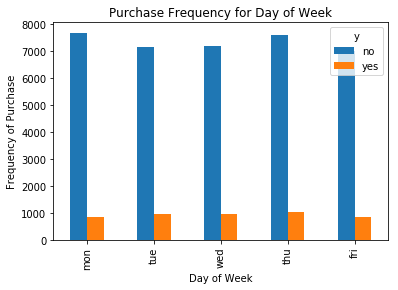

In [277]:
pd.crosstab(bank.day_of_week,bank.y).plot(kind='bar')
plt.title('Purchase Frequency for Day of Week')
plt.xlabel('Day of Week')
plt.ylabel('Frequency of Purchase')

Text(0,0.5,'Frequency of Purchase')

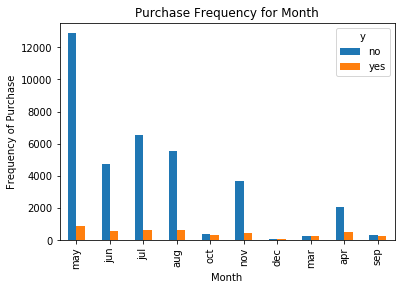

In [278]:
pd.crosstab(bank.month,bank.y).plot(kind='bar')
plt.title('Purchase Frequency for Month')
plt.xlabel('Month')
plt.ylabel('Frequency of Purchase')

Text(0,0.5,'Frequency of Purchase')

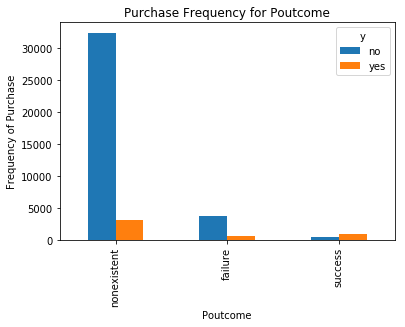

In [280]:
pd.crosstab(bank.poutcome,bank.y).plot(kind='bar')
plt.title('Purchase Frequency for Poutcome')
plt.xlabel('Poutcome')
plt.ylabel('Frequency of Purchase')

### Data Exploration

In [306]:
bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
age               41188 non-null int64
job               41188 non-null object
marital           41188 non-null object
education         41188 non-null object
default           41188 non-null object
housing           41188 non-null object
loan              41188 non-null object
contact           41188 non-null object
month             41188 non-null object
day_of_week       41188 non-null object
duration          41188 non-null int64
campaign          41188 non-null int64
pdays             41188 non-null int64
previous          41188 non-null int64
poutcome          41188 non-null object
emp.var.rate      41188 non-null float64
cons.price.idx    41188 non-null float64
cons.conf.idx     41188 non-null float64
euribor3m         41188 non-null float64
nr.employed       41188 non-null float64
y                 41188 non-null object
dtypes: float64(5), int64(5), object(11)
memory usa

In [309]:
categorical_data = bank.select_dtypes(include='category')
numerical_data = bank.select_dtypes(include=('int64','float64'))

print(categorical_data.shape)
print(numerical_data.shape)

(41188, 11)
(41188, 10)


In [283]:
corr = numerical_data.corr()
corr

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
age,1.000000,-0.000866,0.004594,-0.034369,0.024365,-0.000371,0.000857,0.129372,0.010767,-0.017725
duration,-0.000866,1.000000,-0.071699,-0.047577,0.020640,-0.027968,0.005312,-0.008173,-0.032897,-0.044703
campaign,0.004594,-0.071699,1.000000,0.052584,-0.079141,0.150754,0.127836,-0.013733,0.135133,0.144095
pdays,-0.034369,-0.047577,0.052584,1.000000,-0.587514,0.271004,0.078889,-0.091342,0.296899,0.372605
previous,0.024365,0.020640,-0.079141,-0.587514,1.000000,-0.420489,-0.203130,-0.050936,-0.454494,-0.501333
emp.var.rate,-0.000371,-0.027968,0.150754,0.271004,-0.420489,1.000000,0.775334,0.196041,0.972245,0.906970
cons.price.idx,0.000857,0.005312,0.127836,0.078889,-0.203130,0.775334,1.000000,0.058986,0.688230,0.522034
cons.conf.idx,0.129372,-0.008173,-0.013733,-0.091342,-0.050936,0.196041,0.058986,1.000000,0.277686,0.100513
euribor3m,0.010767,-0.032897,0.135133,0.296899,-0.454494,0.972245,0.688230,0.277686,1.000000,0.945154
nr.employed,-0.017725,-0.044703,0.144095,0.372605,-0.501333,0.906970,0.522034,0.100513,0.945154,1.000000


In [284]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

def VIFfunc(x):
    data_mat = x.as_matrix()
    vif = [variance_inflation_factor(data_mat,i) for i in range(data_mat.shape[1])]
    vif_factors = pd.DataFrame()
    vif_factors['columns'] = x.columns
    vif_factors['vif'] = vif
    return vif_factors

VIFfunc(numerical_data)
    
    

,columns,vif
0,age,16.047296
1,duration,2.011044
2,campaign,1.921499
3,pdays,44.413175
4,previous,2.001464
5,emp.var.rate,28.910219
6,cons.price.idx,22561.123124
7,cons.conf.idx,120.086975
8,euribor3m,226.237349
9,nr.employed,26746.634212


In [285]:
numerical_data.drop(['nr.employed','cons.price.idx','euribor3m'],axis = 1, inplace = True)

In [286]:
VIFfunc(numerical_data)

,columns,vif
0,age,13.023272
1,duration,1.984789
2,campaign,1.911105
3,pdays,34.257941
4,previous,1.773642
5,emp.var.rate,1.270128
6,cons.conf.idx,39.323864


In [287]:
numerical_data.drop(['cons.conf.idx','pdays'],axis = 1,inplace = True)

In [288]:
VIFfunc(numerical_data)

,columns,vif
0,age,2.806385
1,duration,1.876292
2,campaign,1.807322
3,previous,1.357120
4,emp.var.rate,1.238962


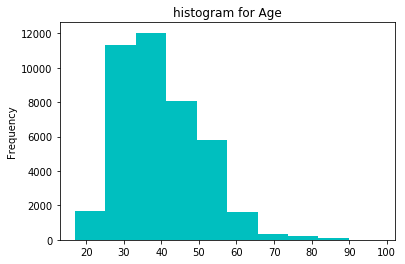

In [289]:
# use hist to create histogram

numerical_data.age.plot(kind='hist', title='histogram for Age', color='c');

In [290]:
print('skewness for age : {0:.2f}'.format(numerical_data.age.skew()))

skewness for age : 0.78


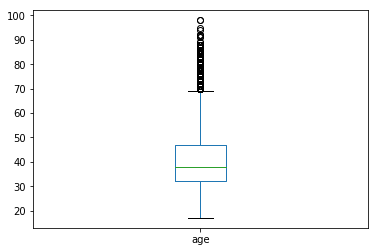

In [291]:
numerical_data.age.plot(kind = 'box')

- If your data distribution is Substantially positive skewness Use  Logarithmic (Log 10) transformation method.


In [294]:
# Try some transformations to reduce the skewness

numerical_data.age = np.log(bank.age) 

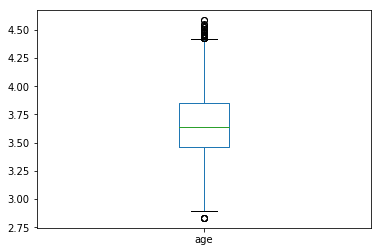

In [295]:
bank.age.plot(kind = 'box')

In [296]:
print('skewness for age : {0:.2f}'.format(numerical_data.age.skew()))

skewness for age : -0.04


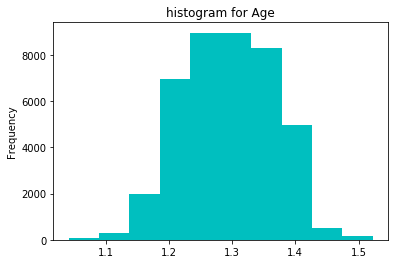

In [297]:
numerical_data.age.plot(kind='hist', title='histogram for Age', color='c');

In [298]:
numerical_data.head()

,age,duration,campaign,previous,emp.var.rate
0,1.392612,261,1,0,1.1
1,1.397000,149,1,0,1.1
2,1.283962,226,1,0,1.1
3,1.305323,151,1,0,1.1
4,1.392612,307,1,0,1.1


### Categorical Data

In [299]:
categorical_data.head()

,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome,y
0,housemaid,married,basic.4y,no,no,no,telephone,may,mon,nonexistent,no
1,services,married,high.school,unknown,no,no,telephone,may,mon,nonexistent,no
2,services,married,high.school,no,yes,no,telephone,may,mon,nonexistent,no
3,admin.,married,basic.6y,no,no,no,telephone,may,mon,nonexistent,no
4,services,married,high.school,no,no,yes,telephone,may,mon,nonexistent,no


In [119]:
categorical_data = bank.select_dtypes(include='uint8')

In [310]:
from sklearn.preprocessing import LabelEncoder

#Auto encodes any dataframe column of type category or object.
def dummyEncode(df):
        columnsToEncode = list(bank.select_dtypes(include=['category','object']))
        le = LabelEncoder()
        for feature in columnsToEncode:
            try:
                bank[feature] = le.fit_transform(bank[feature])
            except:
                print('Error encoding '+feature)
        return df

In [311]:
dummyEncode(bank)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,3,1,0,0,0,0,1,6,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
1,57,7,1,3,1,0,0,1,6,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
2,37,7,1,3,0,2,0,1,6,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
3,40,0,1,1,0,0,0,1,6,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
4,56,7,1,3,0,0,2,1,6,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
5,45,7,1,2,1,0,0,1,6,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
6,59,0,1,5,0,0,0,1,6,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
7,41,1,1,7,1,0,0,1,6,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
8,24,9,2,5,0,2,0,1,6,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
9,25,7,2,3,0,2,0,1,6,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0


In [312]:
bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
age               41188 non-null int64
job               41188 non-null int64
marital           41188 non-null int64
education         41188 non-null int64
default           41188 non-null int64
housing           41188 non-null int64
loan              41188 non-null int64
contact           41188 non-null int64
month             41188 non-null int64
day_of_week       41188 non-null int64
duration          41188 non-null int64
campaign          41188 non-null int64
pdays             41188 non-null int64
previous          41188 non-null int64
poutcome          41188 non-null int64
emp.var.rate      41188 non-null float64
cons.price.idx    41188 non-null float64
cons.conf.idx     41188 non-null float64
euribor3m         41188 non-null float64
nr.employed       41188 non-null float64
y                 41188 non-null int64
dtypes: float64(5), int64(16)
memory usage: 6.6 MB


In [142]:
y = bank.y

In [123]:
from sklearn.feature_selection import chi2


chi2, pval = chi2(categorical_data,y)

In [151]:
cat_var = pd.DataFrame(pval < 0.05,categorical_data.columns)

In [153]:
cat_var.columns

RangeIndex(start=0, stop=1, step=1)

In [141]:
type(cat_var)

pandas.core.frame.DataFrame

In [155]:
np.where(cat_var[0] == True)

(array([ 0,  1,  2,  5,  7,  8, 10, 12, 13, 14, 16, 17, 18, 22, 23, 24, 25,
        33, 34, 35, 37, 38, 40, 41, 42, 43, 44, 46, 47, 50, 51, 52],
       dtype=int64),)

In [157]:
select_indices = list(np.where(cat_var[0] == True)[0])

CAT = cat_var.iloc[select_indices]

In [158]:
categorical = CAT.index

In [161]:
len(categorical)

32

In [163]:
categorical

Index(['job_admin.', 'job_blue-collar', 'job_entrepreneur', 'job_retired',
       'job_services', 'job_student', 'job_unemployed', 'marital_divorced',
       'marital_married', 'marital_single', 'education_basic.4y',
       'education_basic.6y', 'education_basic.9y',
       'education_university.degree', 'education_unknown', 'default_no',
       'default_unknown', 'contact_cellular', 'contact_telephone', 'month_apr',
       'month_dec', 'month_jul', 'month_mar', 'month_may', 'month_nov',
       'month_oct', 'month_sep', 'day_of_week_mon', 'day_of_week_thu',
       'poutcome_failure', 'poutcome_nonexistent', 'poutcome_success'],
      dtype='object')

In [166]:
categorical_data.shape

(41188, 53)

In [176]:
data_vars=categorical_data.columns.values.tolist()
to_keep=[i for i in data_vars if i in categorical]

In [178]:
len(to_keep)

32

In [180]:
bank_final=categorical_data[to_keep]
bank_final.columns.values

array(['job_admin.', 'job_blue-collar', 'job_entrepreneur', 'job_retired',
       'job_services', 'job_student', 'job_unemployed',
       'marital_divorced', 'marital_married', 'marital_single',
       'education_basic.4y', 'education_basic.6y', 'education_basic.9y',
       'education_university.degree', 'education_unknown', 'default_no',
       'default_unknown', 'contact_cellular', 'contact_telephone',
       'month_apr', 'month_dec', 'month_jul', 'month_mar', 'month_may',
       'month_nov', 'month_oct', 'month_sep', 'day_of_week_mon',
       'day_of_week_thu', 'poutcome_failure', 'poutcome_nonexistent',
       'poutcome_success'], dtype=object)

### Concat Data

In [204]:
bank_final.shape

(41188, 32)

In [206]:
numerical_data.shape

(41188, 5)

In [210]:
bank = pd.concat([numerical_data,bank_final],axis = 1)

In [211]:
bank.head()

,duration,campaign,pdays,previous,emp.var.rate,job_admin.,job_blue-collar,job_entrepreneur,job_retired,job_services,...,month_mar,month_may,month_nov,month_oct,month_sep,day_of_week_mon,day_of_week_thu,poutcome_failure,poutcome_nonexistent,poutcome_success
0,261,1,999,0,1.1,0,0,0,0,0,...,0,1,0,0,0,1,0,0,1,0
1,149,1,999,0,1.1,0,0,0,0,1,...,0,1,0,0,0,1,0,0,1,0
2,226,1,999,0,1.1,0,0,0,0,1,...,0,1,0,0,0,1,0,0,1,0
3,151,1,999,0,1.1,1,0,0,0,0,...,0,1,0,0,0,1,0,0,1,0
4,307,1,999,0,1.1,0,0,0,0,1,...,0,1,0,0,0,1,0,0,1,0


In [239]:
bank.drop(['month_dec','job_admin.','day_of_week_thu','education_basic.9y','education_unknown'],axis = 1,inplace = True)

In [240]:
bank.columns

Index(['duration', 'campaign', 'pdays', 'emp.var.rate', 'job_blue-collar',
       'job_entrepreneur', 'job_retired', 'job_services', 'job_student',
       'education_university.degree', 'default_no', 'default_unknown',
       'month_apr', 'month_jul', 'month_mar', 'month_may', 'month_nov',
       'month_oct', 'month_sep', 'day_of_week_mon'],
      dtype='object')

In [241]:
import statsmodels.api as sm

logit_model=sm.Logit(y,bank)
result=logit_model.fit()
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.214353
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                41188
Model:                          Logit   Df Residuals:                    41168
Method:                           MLE   Df Model:                           19
Date:                Wed, 27 Feb 2019   Pseudo R-squ.:                  0.3911
Time:                        16:44:41   Log-Likelihood:                -8828.8
converged:                       True   LL-Null:                       -14499.
                                        LLR p-value:                     0.000
                                  coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
duration                        0.0047   7.32e-05     63.549      0.000   

- The p-values for all the variables are lessthan 0.05 therefore, most of them are significant to the model.

In [242]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(bank, y, test_size=0.3, random_state=0,stratify = y)

### Logistic Regression Model Fitting :

In [243]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

### Predicting the test set results and caculating the accuracy

In [244]:
y_pred = logreg.predict(X_test)

In [245]:
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.91


### Cross Validation

In [246]:
from sklearn import model_selection
from sklearn.model_selection import cross_val_score

kfold = model_selection.KFold(n_splits=10, random_state=7)
modelCV = LogisticRegression()
scoring = 'accuracy'
results = model_selection.cross_val_score(modelCV, X_train, y_train, cv=kfold, scoring=scoring)
print("10-fold cross validation average accuracy: %.3f" % (results.mean()))

10-fold cross validation average accuracy: 0.910


In [247]:
results

array([0.90603329, 0.91467222, 0.91050989, 0.91328477, 0.90669442,
       0.91259105, 0.907735  , 0.90634755, 0.91085675, 0.91259105])

### Confusion Matrix

In [248]:
from sklearn.metrics import confusion_matrix

confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[10662   303]
 [  866   526]]


In [249]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

             precision    recall  f1-score   support

          0       0.92      0.97      0.95     10965
          1       0.63      0.38      0.47      1392

avg / total       0.89      0.91      0.89     12357



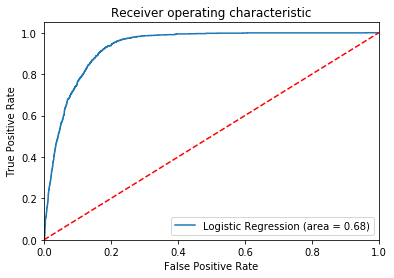

In [250]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))

fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])

plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()